# Training

## try different lambdas
* run_exp.py can be used for training with one or several lambdas at once, all relevant output data will be saved in the output directory you specify. You can also run inside same exp with different lambads and each with different hyperparameters by running run_exp.py with different args for each lambda
* you can specify one or everal gpus to train with and --maxtrainimgs & --maxtestimgs can be used for limiting the number of loaded images for train/test

## Example of running a training with 4 lambdas and 128 filters: 
---------------------------------
```bash
python examples/run_exp.py -v --train_glob="/home/fyang/data/compression_dataset/professional/train/*.png" --last_step=5000 --test_glob="/home/fyang/data/compression_dataset/professional/valid/*.png" --exp_name exp_pro_f64 --lambdas 128,256,512,1024 --num_filters 64 --gpu 5,1 exp --patchsize 240 --maxtrainimgs 600 --maxtestimgs 100 --outdir "experiments/" 2>&1 | tee logs.txt
```

------------------------------------------------

This command will create a directory inside experiments/ to save all output files of the experiment. And for each experiement a new directory will be created for each lambda and inside this directory all model files will be saved along with pickle file that carry values of test metrics (MSE, MSSSIM, ...) and also the args used to create the experiement. You will also have directory with all images compressed and reconstructed and their metrics saved as pickle file. time_analysis.txt will contain time taken for training and for testing

Image metrics:
{'bpp': 0.4884856468023256, 'msssim_db': 9.723278498739507, 'msssim': 0.8934209, 'eval_bpp': 0.48834467, 'psnr': 29.88343, 'mse': 66.79397}
Size of compressed image: 
172.072 kB


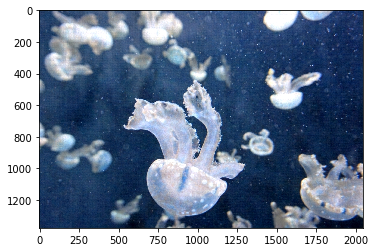

In [2]:
"""
To inspect example outputs after compression-decompression
"""
import matplotlib.image as mpimg
import os
import matplotlib.pyplot as plt
import pickle

imgs_dir = '../experiments/exp_pro_f64/lambda_128.0/compressed_reconstructed_images'
img_name = 'alberto-montalesi-176097'

img = mpimg.imread(os.path.join(imgs_dir, img_name+'_reconstructed.png'))
plt.imshow(img)


with open(os.path.join(imgs_dir, img_name+'_metrics.pkl'), "rb") as fp:
    metrics = pickle.load(fp)
print('========== \nImage metrics:')
print(metrics)
print('========== \nSize of compressed image: ')
print(os.stat(os.path.join(imgs_dir, img_name+'_compressed.bin')).st_size/1000, 'kB')


INFO     | Plotting graphs:
INFO     | ../experiments/exp_pro_f128/['lambda_128.0', 'lambda_256.0', 'lambda_512.0', 'lambda_1024.0']


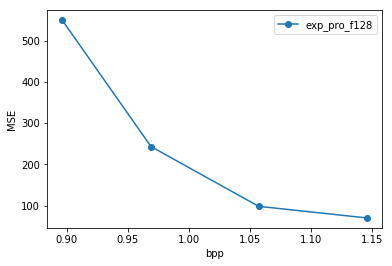

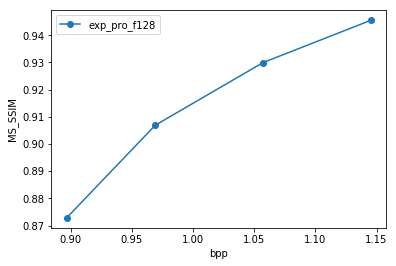

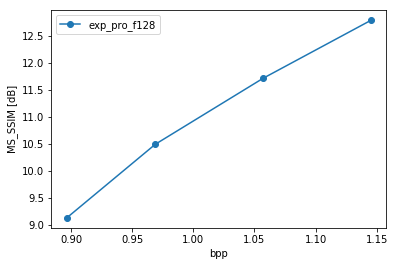

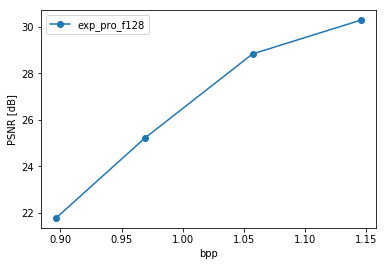

INFO     | Saving plots in ../experiments/plots_exp_pro_f128


,Experiment,lambda,bpp,MS_SSIM [dB],MS_SSIM,PSNR,MSE
0,exp_pro_f128,128.0,0.897,9.127,0.873,21.78,549.864
1,exp_pro_f128,256.0,0.969,10.491,0.907,25.212,243.269
2,exp_pro_f128,512.0,1.057,11.712,0.93,28.832,98.054
3,exp_pro_f128,1024.0,1.145,12.787,0.945,30.279,69.941


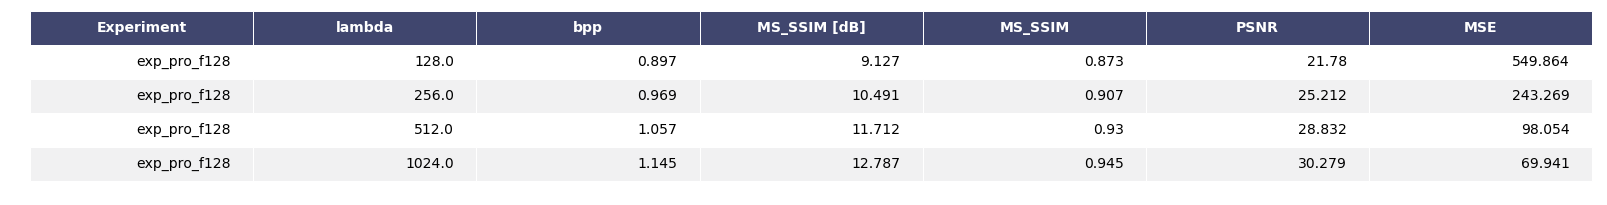

In [2]:
from plot_graphs import plot_graphs
"""
- You can do visualization for one or several experiements on the same plot and the will be saved in outDir
- You can also use the command line for plots
"""

# this will do all plots for one experiement and save them in outdir, 
# if u want to compare several experiemnts (e.g. each with different number of filters) u can put them in expsDir
plot_graphs(expsDir=[ '../experiments/exp_pro_f128/'], outDir='../experiments/')